# Linear regression and gradient descent

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Sep 16, 2025 17:58

# Preamble

## Message of the Day

![](https://ichef.bbci.co.uk/news/1536/cpsprodpb/d40c/live/2c052910-9004-11f0-86c4-a304e538bef3.jpg.webp)

[World’s first AI minister will eliminate corruption, says Albania’s
PM](https://www.bbc.com/news/articles/cm2znzgwj3xo), by Guy Delauney,
BBC, 2025-09-12.

Albania has appointed an **AI minister**, Diella, to the role of
minister for public procurement. While the appointment is symbolic due
to constitutional requirements, Diella aims to **eliminate corruption**
in public tenders by leveraging AI for faster, more efficient, and
accountable processes. The initiative has received mixed reactions, with
some viewing it as a publicity stunt while others see potential for
improving transparency and trust in public procurement.

## Learning Objectives

-   **Differentiate** regression tasks from classification tasks.
-   **Articulate** the training methodology for linear regression
    models.
-   **Interpret** the function of optimization algorithms in addressing
    linear regression.
-   **Detail** the significance of partial derivatives within the
    *gradient descent algorithm*.
-   **Contrast** the **batch**, **stochastic**, and **mini-batch**
    gradient descent methods.

In the previous lecture, we examined two distinct learning algorithms:
$k$-nearest neighbors (KNN) and decision trees, each employing unique
methods for model training and representation. KNN does not involve
explicit learning; instead, the data itself constitutes the model.
Conversely, decision trees utilize a greedy algorithm that begins with
an empty tree and the full training dataset. The algorithm incrementally
adds decision nodes, partitioning the parent dataset into subsets to
achieve greater homogeneity (or purity) within each resulting
classification compared to the parent node. This recursive process
terminates when a node’s data satisfies predefined stopping criteria,
such as achieving a single class, reaching a minimum purity level, or
attaining a maximum tree depth. Once the decision tree is constructed,
the original data is no longer needed. This lecture aimed to demonstrate
that supervised learning models can be represented in various ways, with
each “learning” algorithm tailored to its specific model.

In today’s lecture, we will explore a training algorithm that is
applicable to a diverse range of models, including neural networks.

# Linear Regression

## Rationale

**Linear regression** is introduced to conveniently present a well-known
training algorithm, **gradient descent**. Additionally, it serves as a
foundation for introducing **logistic regression**–a classification
algorithm—which further facilitates discussions on **artificial neural
networks**.

-   Linear Regression
    -   Gradient Descent
    -   Logistic Regression
        -   Neural Networks

From 2 to **2 trillion** parameters!

The training algorithms for machine learning models can vary
significantly depending on the model (e.g., decision trees, SVMs, etc.).
In order to fit our schedule, we will concentrate on this specific
sequence.

The concept of linear regression can be traced back to the early work of
Sir Francis Galton in the late 19th century. Galton introduced the idea
of “regression” in his 1886 paper, which focused on the relationship
between the heights of parents and their children. He observed that
children’s heights tended to regress towards the average, which led to
the term “regression.”

However, the mathematical formulation of linear regression is closely
associated with the work of Karl Pearson, who in the early 20th century
extended Galton’s ideas to create the method of least squares for
fitting a linear model. The method itself, though, was developed earlier
in 1805 by Adrien-Marie Legendre and independently by Carl Friedrich
Gauss for astronomical data analysis.

**See:** Stanton (2001).

## Supervised Learning - Regression

-   The **training data** is a collection of **labelled** examples.
    -   $\{(x_i,y_i)\}_{i=1}^N$
        -   Each $x_i$ is a **feature vector** with $D$ dimensions.
        -   $x_i^{(j)}$ is the value of the **feature** $j$ of the
            example $i$, for $j \in 1 \ldots D$ and $i \in 1 \ldots N$.
    -   The **label** $y_i$ is a **real number**.
-   **Problem**: Given the data set as input, create a **model** that
    can be used to predict the value of $y$ for an unseen $x$.

Can you think of examples of regression tasks?

1.  **House Price Prediction**:
    -   **Application**: Estimating the market value of residential
        properties based on features such as location, size, number of
        bedrooms, age, and amenities.
2.  **Stock Market Forecasting**:
    -   **Application**: Predicting future prices of stocks or indices
        based on historical data, financial indicators, and economic
        variables.
3.  **Weather Prediction**:
    -   **Application**: Estimating future temperatures, rainfall, and
        other weather conditions using historical weather data and
        atmospheric variables.
4.  **Sales Forecasting**:
    -   **Application**: Predicting future sales volumes for products or
        services by analyzing past sales data, market trends, and
        seasonal patterns.
5.  **Energy Consumption Prediction**:
    -   **Application**: Forecasting future energy usage for households,
        industries, or cities based on historical consumption data,
        weather conditions, and economic factors.
6.  **Medical Cost Estimation**:
    -   **Application**: Predicting healthcare costs for patients based
        on their medical history, demographic information, and treatment
        plans.
7.  **Traffic Flow Prediction**:
    -   **Application**: Estimating future traffic volumes and
        congestion levels on roads and highways using historical traffic
        data and real-time sensor inputs.
8.  **Customer Lifetime Value (CLV) Estimation**:
    -   **Application**: Predicting the total revenue a business can
        expect from a customer over the duration of their relationship,
        based on purchasing behavior and demographic data.
9.  **Economic Indicators Forecasting**:
    -   **Application**: Predicting key economic indicators such as GDP
        growth, unemployment rates, and inflation using historical
        economic data and market trends.
10. **Demand Forecasting**:
    -   **Application**: Estimating future demand for products or
        services in various industries like retail, manufacturing, and
        logistics to optimize inventory and supply chain management.
11. **Real Estate Valuation**:
    -   **Application**: Assessing the market value of commercial
        properties like office buildings, malls, and industrial spaces
        based on location, size, and market conditions.
12. **Insurance Risk Assessment**:
    -   **Application**: Predicting the risk associated with insuring
        individuals or properties, which helps in determining premium
        rates, based on historical claims data, and demographic factors.
13. **Ad Click-Through Rate (CTR) Prediction**:
    -   **Application**: Estimating the likelihood that a user will
        click on an online advertisement based on user behavior, ad
        characteristics, and contextual factors.
14. **Loan Default Prediction**:
    -   **Application**: Predicting the probability of a borrower
        defaulting on a loan based on credit history, income, loan
        amount, and other financial indicators.

Focusing on applications possibly running on a mobile device.

1.  **Battery Life Prediction**:
    -   **Application**: Estimating remaining battery life based on
        usage patterns, running applications, and device settings.
2.  **Health and Fitness Tracking**:
    -   **Application**: Predicting calorie burn, heart rate, or sleep
        quality based on user activity, biometrics, and historical
        health data.
3.  **Personal Finance Management**:
    -   **Application**: Forecasting future expenses or savings based on
        spending habits, income patterns, and budget goals.
4.  **Weather Forecasting**:
    -   **Application**: Providing personalized weather forecasts based
        on current location and historical weather data.
5.  **Traffic and Commute Time Estimation**:
    -   **Application**: Predicting travel times and suggesting optimal
        routes based on historical traffic data, real-time conditions,
        and user behavior.
6.  **Image and Video Quality Enhancement**:
    -   **Application**: Adjusting image or video quality settings
        (e.g., brightness, contrast) based on lighting conditions and
        user preferences.
7.  **Fitness Goal Achievement**:
    -   **Application**: Estimating the time needed to achieve fitness
        goals such as weight loss or muscle gain based on user activity
        and dietary input.
8.  **Mobile Device Performance Optimization**:
    -   **Application**: Predicting the optimal settings for device
        performance and battery life based on usage patterns and app
        activity.

## Old Faithful Eruptions

In [1]:
import pandas as pd

WOLFRAM_CSV = "https://raw.githubusercontent.com/turcotte/csi4106-f25/refs/heads/main/datasets/old_faithful_eruptions/Sample-Data-Old-Faithful-Eruptions.csv"
df = pd.read_csv(WOLFRAM_CSV)

# Renaming the columns
df = df.rename(columns={"Duration": "eruptions", "WaitingTime": "waiting"})
print(df.shape)
df.head(6)

(272, 2)

**Attribution:** Wolfram Research, “Sample Data: Old Faithful Eruptions”
from the Wolfram Data Repository (2016) [doi:
10.24097/wolfram.50727.data](https://doi.org/10.24097/wolfram.50727.data)

The dataset used in this presentation was sourced from the Wolfram
Research Data Repository, with its initial publication detailed in
Azzalini and Bowman (1990).

## Old Faithful Geyser

<https://youtu.be/Qxf3xzirBrs>

**Attribution:** Yellowstone National Park Trips

Old Faithful, situated in Yellowstone National Park, is renowned as the
world’s most famous geyser. It can reach eruption heights of up to 140
feet. Notably, its eruption intervals range between 60 and 110 minutes,
contingent upon the duration of the preceding eruption.

## Quick Visualization

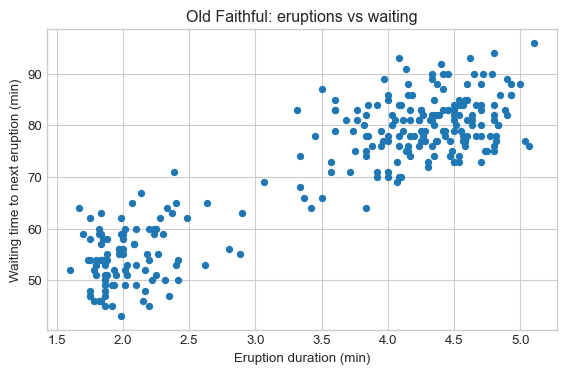

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["eruptions"], df["waiting"], s=20)
plt.xlabel("Eruption duration (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.title("Old Faithful: eruptions vs waiting")
plt.tight_layout()
plt.show()

The duration of the current eruption appears to have a linear
relationship with the subsequent wait time: shorter eruption durations
tend to precede shorter wait times, while longer eruption durations are
associated with longer wait times.

## Problem

-   Predict the **waiting time until the next eruption (min)**, $y$,
    based on the **duration of the current eruption (min)**, $x$.

Selecting a problem characterized by a single attribute allows us to
better focus our discussion and enhance the clarity of visualization.

------------------------------------------------------------------------

<https://youtu.be/qxo8p8PtFeA?si=Buy1DF-T1qPsVE2S>

## Linear Regression

A **linear model** assumes that the value of the **label**, $\hat{y_i}$,
can be expressed as a **linear combination** of the feature values,
$x_i^{(j)}$: $$
  \hat{y_i} = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
$$

. . .

Here, $\theta_{j}$ is the $j$th parameter of the (linear) **model**,
with $\theta_0$ being the **bias** term/parameter, and
$\theta_1 \ldots \theta_D$ being the **feature weights**.

In my presentations, I use $\hat{y_i}$ and $h(x_i)$ synonymously.

In statistical contexts, the notation $\hat{y_i}$ is employed to denote
the estimator of the true value $y_i$. This represents the predicted or
estimated outcome based on a given model.

Conversely, in machine learning, the notation $h(x_i)$ is used, where
$h$ represents the hypothesis function or model applied to the input
data $x_i$. The hypothesis function $h$ is derived from a predefined
hypothesis space, which encompasses the set of all possible models that
can be used to map input data to predicted outcomes.

The parameter $\theta_0$ is called the **bias term** (also “intercept”)
because:

-   It **shifts the prediction independently of the inputs**.
-   Geometrically, it moves the regression hyperplane up or down (or
    left/right in classification), so the model is not forced to pass
    through the origin.
-   In machine learning terms, it acts like a **constant offset**,
    compensating for systematic effects not explained by the features.

So it’s called “bias” because it introduces a fixed baseline to which
the contributions of the other parameters are added.

In a machine learning model, the **parameters** are the **weights** and
the **biases**.

## Definition

**Problem**: find values for all the model parameters so that the model
**“best fits”** the training data.

. . .

-   The **Root Mean Square Error** is a common performance measure for
    regression problems.

$$
    \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
$$

In practical implementation, algorithms typically optimize the mean
squared error (MSE) due to its mathematical tractability and the fact
that it converges to the same parameter estimates as other error
measures. While our current focus is on using MSE, the algorithm can be
adapted to work with a range of objective functions.

## Minimizing RMSE

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/2085px-Linear_least_squares_example2.svg.png)

**Attribution**:
[Krishnavedala](https://commons.wikimedia.org/wiki/File:Linear_least_squares_example2.svg),
[CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0), via
Wikimedia Commons

## Learning

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df[["eruptions"]].values  # shape (n_samples, 1)
y = df["waiting"].values      # shape (n_samples,)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit via SGDRegressor — linear model via gradient descent
sgd = SGDRegressor(
    loss="squared_error",
    penalty=None,
    learning_rate="constant",
    eta0=0.01,
    max_iter=2000,
    tol=None,
    random_state=42
)

sgd.fit(X_train, y_train)

print("Learned parameters:")
print(f"  intercept = {sgd.intercept_[0]:.3f}")
print(f"  slope     = {sgd.coef_[0]:.3f}")

y_pred = sgd.predict(X_test)
print(f"Test MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"Test R²  = {r2_score(y_test, y_pred):.3f}")

Learned parameters:
  intercept = 32.910
  slope     = 10.503
Test MSE = 43.02
Test R²  = 0.671

## Visualization

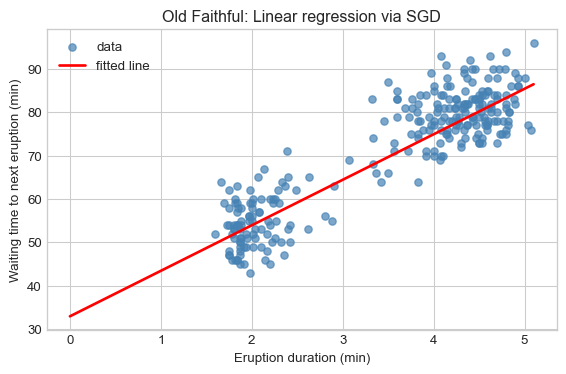

In [4]:
import numpy as np

# Scatter the data
plt.figure(figsize=(6,4))
plt.scatter(X, y, color="steelblue", s=30, alpha=0.7, label="data")

# Plot the fitted line
x_line = np.linspace(0, X.max(), 100).reshape(-1, 1)
y_line = sgd.predict(x_line)
plt.plot(x_line, y_line, color="red", linewidth=2, label="fitted line")

plt.xlabel("Eruption duration (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.title("Old Faithful: Linear regression via SGD")
plt.legend()
plt.tight_layout()
plt.show()

In the plot above, the line $x=0$ is included to facilitate the
visualization of the intercept, which is given by $\theta_0 = 32.910$.

## Characteristics

A typical **learning algorithm** comprises the following components:

1.  A **model**, often consisting of a set of **parameters** whose
    values will be **“learnt”**.
2.  An **objective function**.
    -   In the case of **regression**, this is often a **loss
        function**, a function that quantifies misclassification. The
        **Root Mean Square Error** is a common loss function for
        regression problems. $$
        \sqrt{\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2}
        $$
3.  **Optimization** algorithm

## Optimization

**Until** some termination criteria is met[1]:

-   **Evaluate** the loss function, comparing $h(x_i)$ to $y_i$.
-   **Make small changes to the parameters**, in a way that reduces the
    value of the loss function.

## Remarks

-   It is important to separate the **optimization algorithm** from the
    **problem** it addresses.
-   For **linear regression**, an exact analytical solution exists, but
    it presents certain limitations.
-   **Gradient descent** serves as a general algorithm applicable not
    only to linear regression, but also to logistic regression, deep
    learning, t-SNE (t-distributed Stochastic Neighbor Embedding), among
    various other problems.
-   There exists a diverse range of optimization algorithms that **do
    not rely on gradient-based methods**.

## Optimization — single feature

-   **Model** (hypothesis):  
    $$
     h(x_i; \theta) = \theta_0 + \theta_1 x_i^{(1)}
    $$

-   **Loss/cost function**:  
    $$
     J(\theta_0, \theta_1) = \frac{1}{N}\sum_{i=1}^N [h(x_i;\theta) - y_i]^2
    $$

**Goal**: find $\theta_0, \theta_1$ that minimize $J$, by iteratively
updating the parameters.

This screen is paramount for our presentation, and it is essential to
grasp its content fully, as it often causes confusion.

In machine learning, an algorithm generates a model, denoted as $h$.
This model is derived from the training data, represented by $X$. After
the model is trained, it can be utilized to predict outcomes for new,
unseen data points, denoted by $x_{\mathrm{new}}$. Once trained, the
model’s parameters, $\theta$, become fixed. The model functions by
mapping each input $x_i$ to a predicted output $\hat{y}_i$,
$x_i \mapsto \hat{y}_i$.

The cost function is used to determine the optimal parameter values,
$\theta$, for the model $h$. On this screen, the loss is specified as
the mean squared error. Our goal is to identify $\theta$ such that the
model $h$ minimizes its error on the training dataset $X$. The loss
function maps the parameter pair $(\theta_0, \theta_1)$ to a
non-negative real number $\mathbb{R}_{\ge0}$,
$(\theta_0,\theta_1)\mapsto\mathbb{R}_{\ge0}$, which aggregates errors
across all data points.

Gradient descent is a process that operates in the parameter space,
where it adjusts $\theta$ to minimize the loss, rather than in the
feature space of the data.

The notation $h(x_i; \theta)$ indicates that the value of the function
$h$ (of the model) depends on the input example $x_i$ as well as the
parameters $\theta$. The semicolon is used to semantically differentiate
these two sets of values. This convention comes from the field of
statistics. In machine learning, we also use the notation
$h_{\theta}(x_i)$, which can be considered more appropriate. In this
context, we refer to an indexed family of functions, where $\theta$
specifically determines which function $h_\theta$ should be used. This
notation is read as follows: “the function $h$, parameterized by
$\theta$, applied to the input $x_i$.”

## Hypothesis vs Parameter Space

[1] E.g. the value of the **loss function no longer decreases** or the
**maximum number of iterations**.

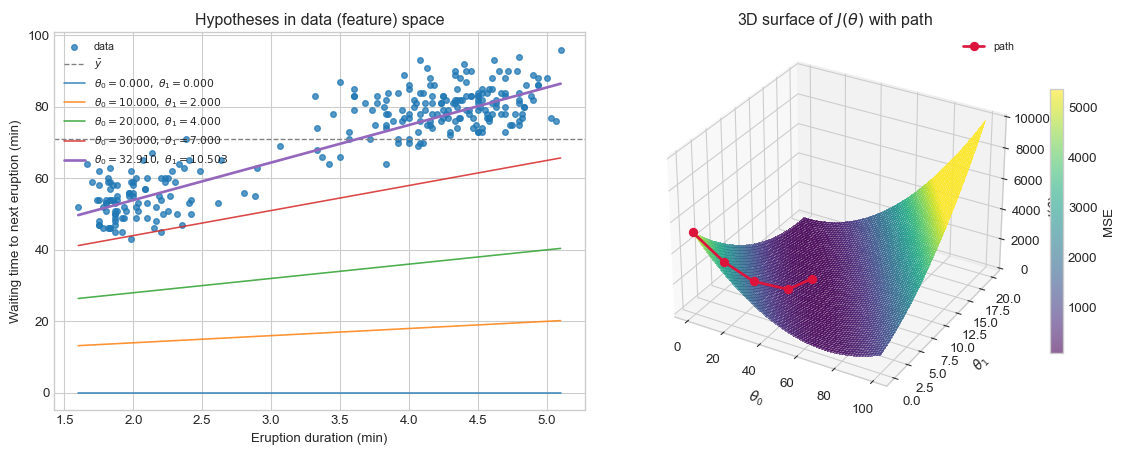

In this example, we use the Old Faithful geyser eruption dataset.

The figure on the left illustrates the data within its feature space,
where each line represents a distinct hypothesis. For instance, the
horizontal blue line corresponds to the hypothesis defined by parameters
$(\theta_0=0, \theta_1=0)$, while the orange line corresponds to
$(\theta_0=10, \theta_1=2)$. The sequence of model parameters, or
hypotheses, has been deliberately designed to elucidate the underlying
concepts.

Conversely, the figure on the right depicts the parameter space, which
is where optimization is performed. In this space, the vertical axis
indicates the Mean Squared Error (MSE) for all combinations of
$\theta_0$ and $\theta_1$. Specifically, a model characterized by these
parameters would incur this level of error with the specified training
data. During the training process, the data remains constant, whereas
the parameters $\theta_0$ and $\theta_1$ are adjusted to minimize the
error.

In the figure on the right, the progression of model parameters, denoted
as ($\theta_0, \theta_1$) with the sequence
$\{(0.000, 0.000), (10.000, 2.000), (20.000, 4.000), (30.000, 7.000), (32.910, 10.503)\}$,
illustrates a reduction in the mean squared error (MSE), $J(\theta)$.

## Hypothesis vs Parameter Space

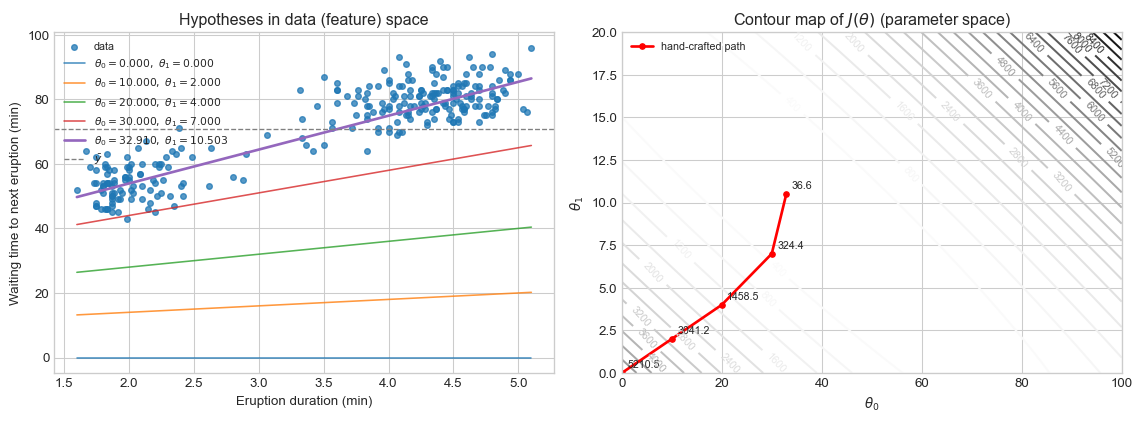

Thes figures illustrate the same concept, but using a contour plot.

# Derivative

## Derivative

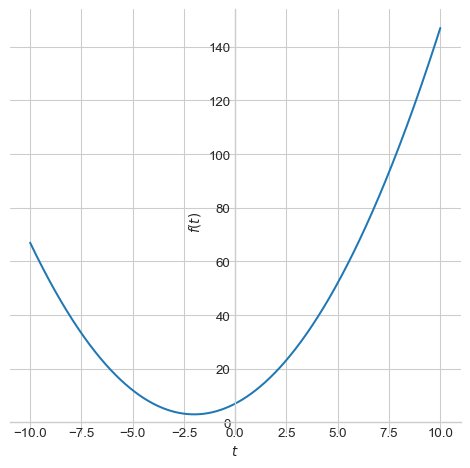

-   We will start with a **single-variable function**.
-   Think of this as our **loss function**, which we aim to minimize; to
    reduce the average discrepancy between expected and predicted
    values.
-   Here, I am using $t$ to avoid any confusion with the attributes of
    our training examples.

## Source code

In [8]:
from sympy import *

x = symbols('t')

f = t**2 + 4*t + 7

plot(f)

On the previous slide, I’ve used [**SymPy**](https://www.sympy.org/), a
library for **symbolic mathematics**.

## Derivative

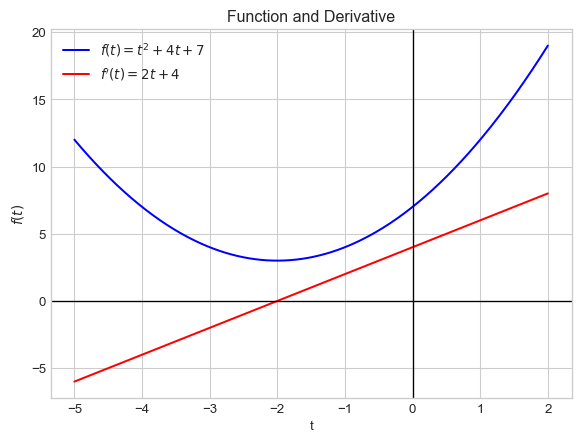

-   The graph of the **derivative**, $f^{'}(t)$, is depicted in **red**.

-   The **derivative** indicates how changes in the input affect the
    output, $f(t)$.

-   The magnitude of the **derivative** at $t = -2$ is $0$.

-   This point corresponds to the **minimum** of our function.

Near $t = -2$, variations in $t$ have minimal impact on the output,
$f(t)$.

## Derivative

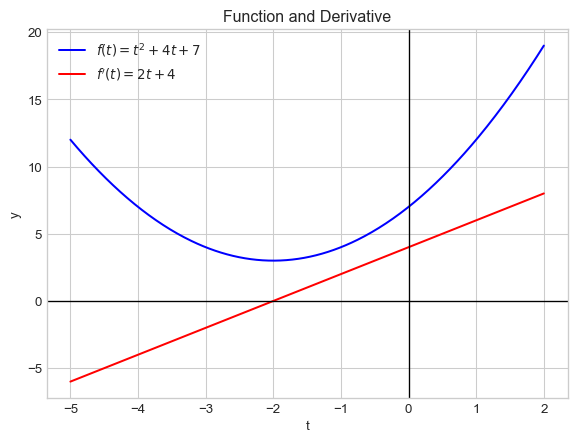

-   When evaluated at a **specific point**, the derivative indicates the
    **slope** of the **tangent line** to the graph of the function at
    that point.
-   At $t= -2$, the **slope** of the **tangent line** is 0.

## Derivative

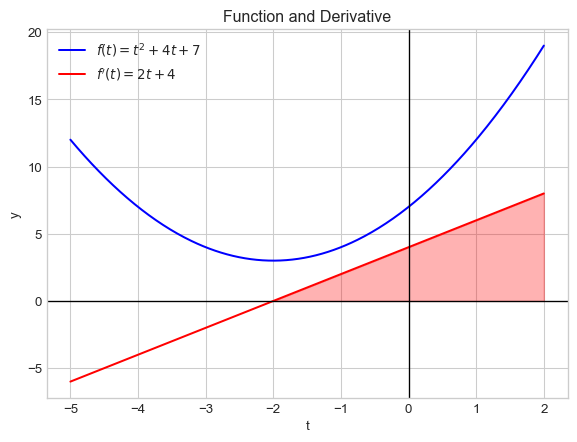

-   A **positive derivative** indicates that **increasing the input
    variable** will **increase the output value**.

-   Additionally, the **magnitude** of the derivative quantifies how
    **rapidly** the output changes.

## Derivative

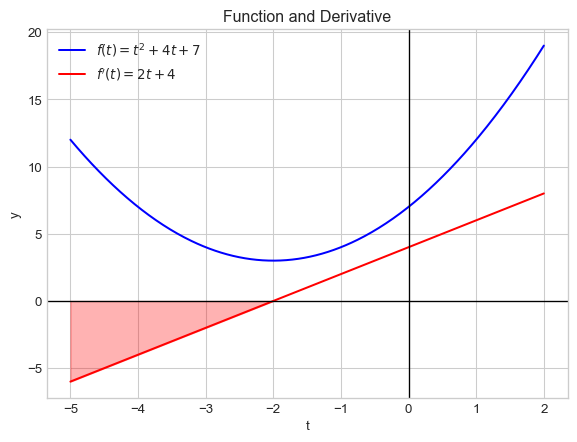

-   A **negative derivative** indicates that **increasing the input
    variable** will **decrease the output value**.

-   Additionally, the **magnitude** of the derivative quantifies how
    **rapidly** the output changes.

## Source code

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
t = sp.symbols('t')
f = t**2 + 4*t + 7

# Compute the derivative
f_prime = sp.diff(f, t)

# Lambdify the functions for numerical plotting
f_func = sp.lambdify(t, f, "numpy")
f_prime_func = sp.lambdify(t, f_prime, "numpy")

# Generate t values for plotting
t_vals = np.linspace(-5, 2, 400)

# Get y values for the function and its derivative
f_vals = f_func(t_vals)
f_prime_vals = f_prime_func(t_vals)

# Plot the function and its derivative
plt.plot(t_vals, f_vals, label=r'$f(t) = t^2 + 4t + 7$', color='blue')
plt.plot(t_vals, f_prime_vals, label=r"$f'(t) = 2t + 4$", color='red')

# Fill the area below the derivative where it's negative
plt.fill_between(t_vals, f_prime_vals, where=(f_prime_vals > 0), color='red', alpha=0.3)

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Function and Derivative')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Gradient Descent

## Gradient Descent — Single Feature

-   **Model** (hypothesis):  
    $$
     h(x_i; \theta) = \theta_0 + \theta_1 x_i^{(1)}
    $$

-   **Loss/cost function**:  
    $$
     J(\theta_0, \theta_1) = \frac{1}{N}\sum_{i=1}^N [h(x_i;\theta) - y_i]^2
    $$

## Gradient descent - intuition

<https://youtu.be/i62czvwDlsw>

## Gradient Descent - Step-by-Step

<https://www.youtube.com/watch?v=sDv4f4s2SB8>

## Gradient descent - single value

-   **Initialization:** $\theta_0$ and $\theta_1$ - either with random
    values or zeros.
-   **Loop:**
    -   repeat until convergence: $$
        \theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1) , \text{for } j=0 \text{ and } j=1
        $$
-   $\alpha$ is called the **learning rate** - this is the size of each
    step.
-   $\frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1)$ is the
    **partial derivative** with respect to $\theta_j$.

A **partial derivative** represents the rate of change of a
multivariable function **with respect to one of its variables**, while
**keeping the other variables constant**.

For the algorithm to be mathematically sound, all the $\theta_j$ must be
updated **simultaneously**.

## Gradient Descent - Single Value

``` python
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
t = sp.symbols('t')
f = t**2 + 4*t + 7

# Compute the derivative
f_prime = sp.diff(f, t)

# Lambdify the functions for numerical plotting
f_func = sp.lambdify(t, f, "numpy")
f_prime_func = sp.lambdify(t, f_prime, "numpy")

# Generate t values for plotting
t_vals = np.linspace(-5, 2, 400)

# Get y values for the function and its derivative
f_vals = f_func(t_vals)
f_prime_vals = f_prime_func(t_vals)

# Plot the function and its derivative
plt.plot(t_vals, f_vals, label=r'$J$', color='blue')
plt.plot(t_vals, f_prime_vals, label=r"$\frac {\partial}{\partial \theta_j}J(\theta)$", color='red')

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Function and Derivative')
plt.xlabel(r'$\theta_j$')
plt.ylabel(r'$J$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
```

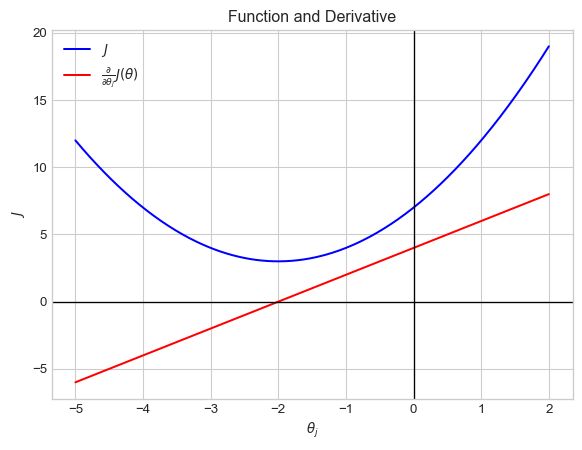

-   When the value of $\theta_j$ is in the range $[- \inf, -2)$,
    $\frac {\partial}{\partial \theta_j}J(\theta)$ has a **negative**
    value.

-   Therefore, $- \alpha \frac {\partial}{\partial \theta_j}J(\theta)$
    is **positive**.

-   Accordingly, the value of $\theta_j$ is **increased**.

Updating rule:
$\theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1) , \text{for } j=0 \text{ and } j=1$.

## Gradient Descent - Single Value

``` python
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
t = sp.symbols('t')
f = t**2 + 4*t + 7

# Compute the derivative
f_prime = sp.diff(f, t)

# Lambdify the functions for numerical plotting
f_func = sp.lambdify(t, f, "numpy")
f_prime_func = sp.lambdify(t, f_prime, "numpy")

# Generate t values for plotting
t_vals = np.linspace(-5, 2, 400)

# Get y values for the function and its derivative
f_vals = f_func(t_vals)
f_prime_vals = f_prime_func(t_vals)

# Plot the function and its derivative
plt.plot(t_vals, f_vals, label=r'$J$', color='blue')
plt.plot(t_vals, f_prime_vals, label=r"$\frac {\partial}{\partial \theta_j}J(\theta)$", color='red')

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Function and Derivative')
plt.xlabel(r'$\theta_j$')
plt.ylabel(r'$J$')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
```

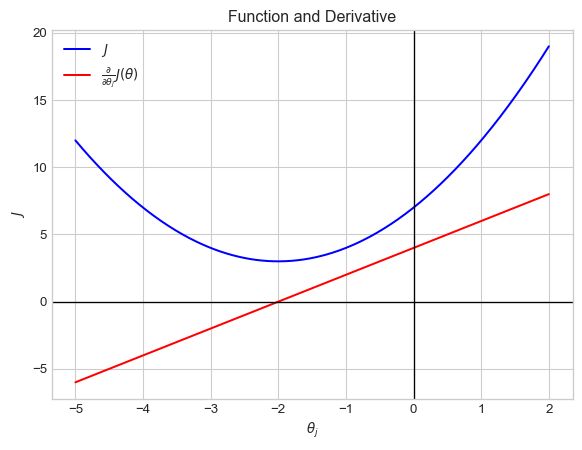

-   When the value of $\theta_j$ is in the range $(-2, \infty]$,
    $\frac {\partial}{\partial \theta_j}J(\theta)$ has a **positive**
    value.

-   Therefore, $- \alpha \frac {\partial}{\partial \theta_j}J(\theta)$
    is **negative**.

-   Accordingly, the value of $\theta_j$ is **decreased**.

Updating rule:
$\theta_j := \theta_j - \alpha \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1) , \text{for } j=0 \text{ and } j=1$.

## Partial derivatives

Given

$$
J(\theta_0, \theta_1) = \frac{1}{N}\sum_1^N [h(x_i) - y_i]^2 = \frac{1}{N}\sum_1^N [\theta_0 + \theta_1 x_i - y_i]^2
$$

. . .

We have

$$
\frac {\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} [\theta_0 - \theta_1 x_i - y_{i}]
$$

. . .

and

$$
\frac {\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{2}{N} \sum\limits_{i=1}^{N} x_{i} [\theta_0 + \theta_1 x_i - y_{i}]
$$

## Partial derivate (SymPy)

In [16]:
from IPython.display import Math, display
from sympy import *

# Define the symbols

theta_0, theta_1, x_i, y_i = symbols('theta_0 theta_1 x_i y_i')

# Define the hypothesis function:

h = theta_0 + theta_1 * x_i

print("Hypothesis function:")

display(Math('h(x) = ' + latex(h)))

Hypothesis function:

## Partial derivate (SymPy)

In [17]:
N = Symbol('N', integer=True)

# Define the loss function (mean squared error)

J = (1/N) * Sum((h - y_i)**2, (x_i, 1, N))

print("Loss function:")

display(Math('J = ' + latex(J)))

Loss function:

## Partial derivate (SymPy)

In [18]:
# Calculate the partial derivative with respect to theta_0

partial_derivative_theta_0 = diff(J, theta_0)

print("Partial derivative with respect to theta_0:")

display(Math(latex(partial_derivative_theta_0)))

Partial derivative with respect to theta_0:

## Partial derivate (SymPy)

In [19]:
# Calculate the partial derivative with respect to theta_1

partial_derivative_theta_1 = diff(J, theta_1)

print("\nPartial derivative with respect to theta_1:")

display(Math(latex(partial_derivative_theta_1)))


Partial derivative with respect to theta_1:

## Multivariate linear regression

$$
h (x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \theta_3 x_i^{(3)} + \cdots + \theta_D x_i^{(D)}
$$

$$
\begin{align*}
  x_i^{(j)} &= \text{value of the feature } j \text{ in the } i \text{th example} \\ 
  D &= \text{the number of features}
\end{align*}
$$

## Gradient descent - multivariate

The new **loss function** is

$$
J(\theta_0, \theta_1,\ldots,\theta_D) =  \dfrac {1}{N} \displaystyle \sum _{i=1}^N [h(x_{i}) - y_i ]^2
$$

Its **partial derivative**:

$$
\frac {\partial}{\partial \theta_j}J(\theta) = \frac{2}{N} \sum\limits_{i=1}^N x_i^{(j)} [\theta x_i - y_i ]
$$

**where** $\theta$, $x_i$ and $y_i$ are vectors, and $\theta x_i$ is a
vector operation!

## Gradient vector

The vector containing the partial derivative of $J$ (with respect to
$\theta_j$, for $j \in \{0, 1\ldots D\}$) is called the **gradient
vector**.

$$
\nabla_\theta J(\theta) = \begin{pmatrix}
  \frac {\partial}{\partial \theta_0}J(\theta) \\
  \frac {\partial}{\partial \theta_1}J(\theta) \\
  \vdots  \\
  \frac {\partial}{\partial \theta_D}J(\theta)\\
\end{pmatrix}
$$

. . .

-   This vector gives the direction of the **steepest ascent**.
-   It gives its name to the **gradient descent** algorithm:

$$
\theta' = \theta - \alpha \nabla_\theta J(\theta)
$$

## Gradient descent - multivariate

The gradient descent algorithm becomes:

**Repeat until convergence:**

$$
\begin{aligned}
\{ & \\
\theta_j := & \theta_j -  \alpha  \frac {\partial}{\partial \theta_j}J(\theta_0, \theta_1, \ldots, \theta_D) \\ 
 &\text{for } j \in [0, \ldots, D] \textbf{ (update simultaneously)} \\
\} &
\end{aligned}
$$

## Gradient descent - multivariate

**Repeat until convergence:**

$$
\begin{aligned}
 \; \{ & \\
\; & \theta_0 := \theta_0 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{0}_i[h(x_i) - y_i] \\
\; & \theta_1 := \theta_1 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{1}_i[h(x_i) - y_i]  \\
\; & \theta_2 := \theta_2 - \alpha \frac{2}{N} \sum\limits_{i=1}^{N}  x^{2}_i[h(x_i) - y_i] \\
   & \cdots \\ 
\} &
\end{aligned}
$$

Where $x_0 = 1$.

## Assumptions

What were our **assumptions**?

. . .

-   The (objective/loss) function is **differentiable**.

## Local vs. global

-   A function is **convex** if for any pair of points on the graph of
    the function, the line connecting these two points lies above or on
    the graph.

    -   A **convex** function has a **single** minimum.
        -   The loss function for the linear regression (MSE) is convex.

-   For functions that are not convex, the gradient descent algorithm
    converges to a **local** minimum.

-   The loss function generally used with linear or logistic
    regressions, and Support Vector Machines (SVM) are convex, but not
    the ones for artificial neural networks.

A function would be convex downward or concave if those lines were below
or on the graph of the function.

## Local vs. global

![](https://upload.wikimedia.org/wikipedia/commons/1/1e/Extrema_example.svg)

**Attribution:**
[commons.wikimedia.org/wiki/File:Extrema_example.svg](https://commons.wikimedia.org/wiki/File:Extrema_example.svg)

## Convergence

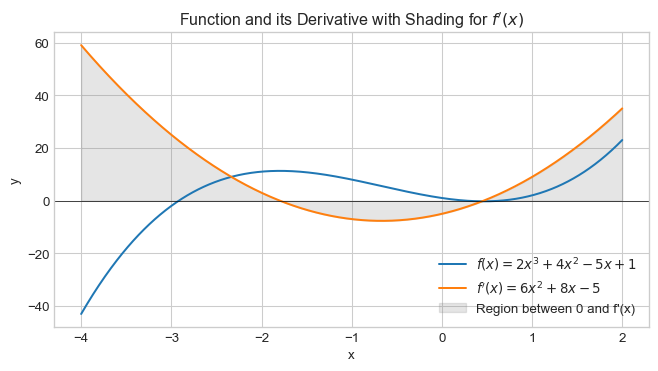

In [20]:
# 1. Define the symbolic variable and the function
x = sp.Symbol('x', real=True)
f_expr = 2*x**3 + 4*x**2 - 5*x + 1

# 2. Compute the derivative of f
f_prime_expr = sp.diff(f_expr, x)

# 3. Convert symbolic expressions to Python functions
f = sp.lambdify(x, f_expr, 'numpy')
f_prime = sp.lambdify(x, f_prime_expr, 'numpy')

# 4. Generate a range of x-values
x_vals = np.linspace(-4, 2, 1000)

# 5. Compute f and f' over this range
y_vals = f(x_vals)
y_prime_vals = f_prime(x_vals)

# 6. Prepare LaTeX strings for legend
f_label = rf'$f(x) = {sp.latex(f_expr)}$'
f_prime_label = rf'$f^\prime(x) = {sp.latex(f_prime_expr)}$'

# 7. Plot f and f', with equations in the legend
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=f_label)
plt.plot(x_vals, y_prime_vals, label=f_prime_label)

# 8. Shade the region between x-axis and f'(x) for the entire domain
plt.fill_between(x_vals, y_prime_vals, 0, color='gray', alpha=0.2, interpolate=True,
                 label='Region between 0 and f\'(x)')

# 9. Add reference line, labels, legend, etc.
plt.axhline(0, color='black', linewidth=0.5)
plt.title(rf'Function and its Derivative with Shading for $f^\prime(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

For **functions lacking a global minimum**, gradient descent can
**continue descending indefinitely**, preventing convergence.

-   The first objective of this example is to illustrate that gradient
    descent is applicable to functions of arbitrary complexity, provided
    that the gradient can be computed or approximated at each iteration.

-   Furthermore, the function must possesses at least one local minimum
    within the interval of interest.

## Learning Rate

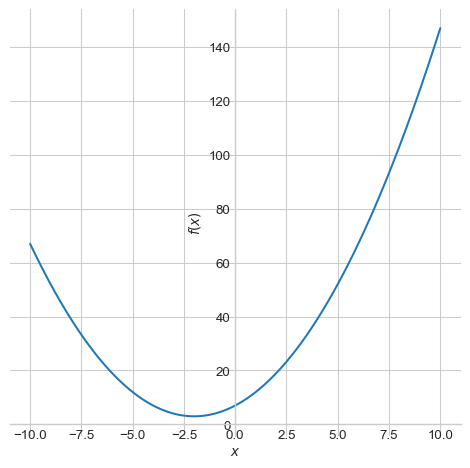

-   **Small steps**, low values for $\alpha$, will make the algorithm
    **converge slowly**.
-   **Large steps** might cause the algorithm to **diverge**.
-   Notice how the algorithm **slows down** naturally when approaching a
    minimum.

## Learning Rate

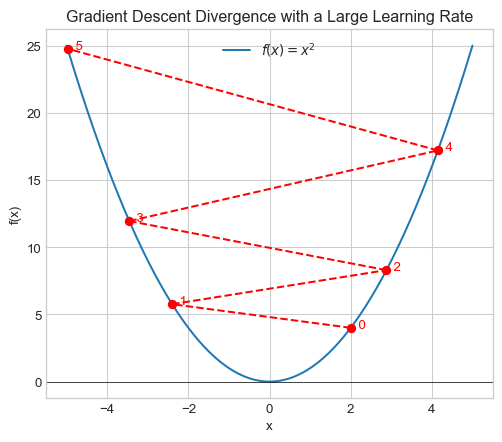

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad_f(x):
    return 2*x

# Initial guess, learning rate, and number of gradient-descent steps
x_current = 2.0
learning_rate = 1.1  # Too large => divergence
num_iterations = 5   # We'll do five updates

# Store each x value in a list (trajectory) for plotting
trajectory = [x_current]

# Perform gradient descent
for _ in range(num_iterations):
    g = grad_f(x_current)
    x_current = x_current - learning_rate * g
    trajectory.append(x_current)

# Prepare data for plotting
x_vals = np.linspace(-5, 5, 1000)
y_vals = f(x_vals)

# Plot the function f(x)
plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^2$")
plt.axhline(0, color='black', linewidth=0.5)

# Plot the trajectory, labeling each iteration
for i, x_t in enumerate(trajectory):
    y_t = f(x_t)
    # Plot the point
    plt.plot(x_t, y_t, 'ro')
    # Label the iteration number
    plt.text(x_t, y_t, f"  {i}", color='red')
    # Connect consecutive points
    if i > 0:
        x_prev = trajectory[i - 1]
        y_prev = f(x_prev)
        plt.plot([x_prev, x_t], [y_prev, y_t], 'r--')

# Final touches
plt.title("Gradient Descent Divergence with a Large Learning Rate")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Batch gradient descent

-   To be more precise, this algorithm is known as **batch gradient
    descent** since for each iteration, it processes the “whole batch”
    of training examples.

. . .

-   Literature suggests that the algorithm might take more time to
    converge if the features are on different scales.

## Batch gradient descent - drawback

-   The **batch gradient descent** algorithm becomes very **slow** as
    the **number of training examples increases**.

. . .

-   This is because **all** the training data is seen at **each
    iteration**. The algorithm is generally run for a fixed number of
    iterations, say 1000.

## Stochastic Gradient Descent

The **stochastic gradient descent** algorithm randomly selects **one**
training instance to calculate its gradient.

``` python
epochs = 10
for epoch in range(epochs):
   for i in range(N):
         selection = np.random.randint(N)
         # Calculate the gradient using selection
         # Update the parameters
```

-   This allows it to work with large training sets.
-   Its trajectory is not as regular as the batch algorithm.
    -   Because of its bumpy trajectory, it is often better at finding
        the **global minima**, when compared to batch.
    -   Its bumpy trajectory makes it bounce around the local minima.

To mitigate the issue of oscillating around local minima, it is
advisable to progressively reduce the learning rate as the number of
epochs increases. This technique, known as a **learning schedule**,
helps achieve more stable convergence.

It important that the examples are either **selected randomly** or
**shuffled** before running the algorithm to make sure that the
algorithm converges towards the global minima.

## Mini-batch gradient descent

-   At each step, rather than selecting one training example as SGD
    does, **mini-batch gradient descent** randomly selects a **small
    number** of training examples to compute the gradients.
-   Its trajectory is more regular compared to SGD.
    -   As the size of the mini-batches increases, the algorithm becomes
        increasingly similar to batch gradient descent, which uses all
        the examples at each step.
-   It can take advantage of the hardware acceleration of matrix
    operations, particularly with GPUs.

## Quick Visualization

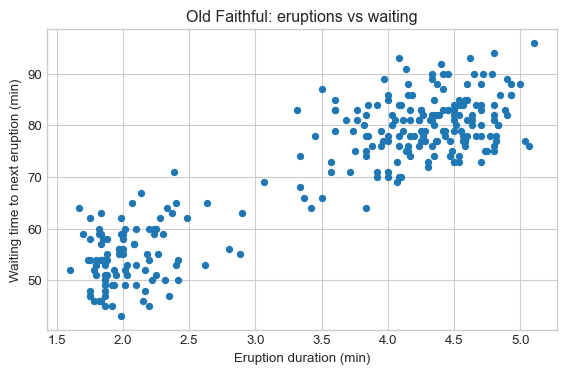

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["eruptions"], df["waiting"], s=20)
plt.xlabel("Eruption duration (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.title("Old Faithful: eruptions vs waiting")
plt.tight_layout()
plt.show()

## Stochastic, Mini-Batch, Batch

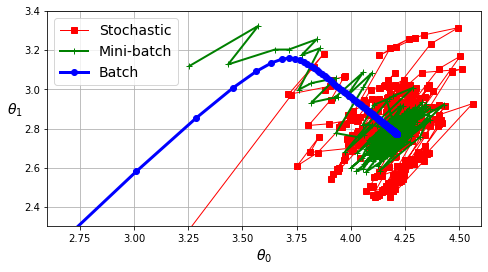

**Attribution:** Géron (2022), Figure 4.10,
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb)

## Summary

-   **Batch gradient descent** is inherently **slow** and impractical
    for large datasets requiring **out-of-core** support, though it is
    capable of handling a substantial number of features.

-   **Stochastic gradient descent** is **fast** and well-suited for
    processing a large volume of examples efficiently.

-   **Mini-batch gradient descent** combines the benefits of both batch
    and stochastic methods; it is **fast**, capable of managing large
    datasets, and leverages hardware acceleration, particularly with
    GPUs.

The typical size of a mini-batch when applying stochastic gradient
descent (SGD) can vary depending on the specific application and
dataset, but common sizes often range between 32 and 512 samples. Here
are some common mini-batch sizes used in practice:

1.  **Small Mini-Batches**: Sizes such as 16, 32, or 64 are often used
    when working with smaller datasets or when memory constraints are a
    concern.
2.  **Medium Mini-Batches**: Sizes like 128, 256, or 512 are commonly
    used and can provide a good balance between computational efficiency
    and convergence speed.
3.  **Large Mini-Batches**: Sizes like 1024, 2048, or larger might be
    used in large-scale machine learning tasks, especially when
    sufficient computational resources are available.

The choice of mini-batch size can influence several factors such as:

-   **Training Speed**: Larger mini-batches can make better use of
    parallel processing capabilities, potentially speeding up training.
-   **Convergence**: Smaller mini-batches can introduce more noise in
    the gradient estimation, which can sometimes help escape local
    minima and improve generalization.
-   **Memory Usage**: Larger mini-batches require more memory, which
    might be a limiting factor, especially on GPUs with limited VRAM.

Ultimately, the optimal mini-batch size is task-specific and often
determined empirically through experimentation.

All three are implemented by `SGDRegressor` in `Scikit-Learn`.

## Optimization and deep nets

We will briefly revisit the subject when discussing **deep artificial
neural networks**, for which **specialized optimization algorithms**
exist.

-   Momentum Optimization
-   Nesterov Accelerated Gradient
-   AdaGrad
-   RMSProp
-   Adam and Nadam

## Final word

-   Optimization is a vast subject. Other algorithms exist and are used
    in other contexts.
    -   Including:
        -   Particle swarm optimization (PSO), genetic algorithms (GAs),
            and artificial bee colony (ABC) algorithms.

# Prologue

## Linear regression - summary

-   A **linear model** assumes that the value of the label, $\hat{y_i}$,
    can be expressed as a **linear combination** of the feature values,
    $x_i^{(j)}$:
    $\hat{y_i} = h(x_i) = \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}$
-   The **Mean Squared Error (MSE)** is:
    $\frac{1}{N}\sum_1^N [h(x_i) - y_i]^2$
-   **Batch**, **stochastic**, or **mini-batch gradient descent** can be
    used to find “optimal” values for the parameters, $\theta_j$ for
    $j \in 0, 1, \ldots, D$.
-   The result is a **regressor**, a function that can be used to
    predict the $y$ value (the label) for some unseen example $x$.

## Andrew Ng

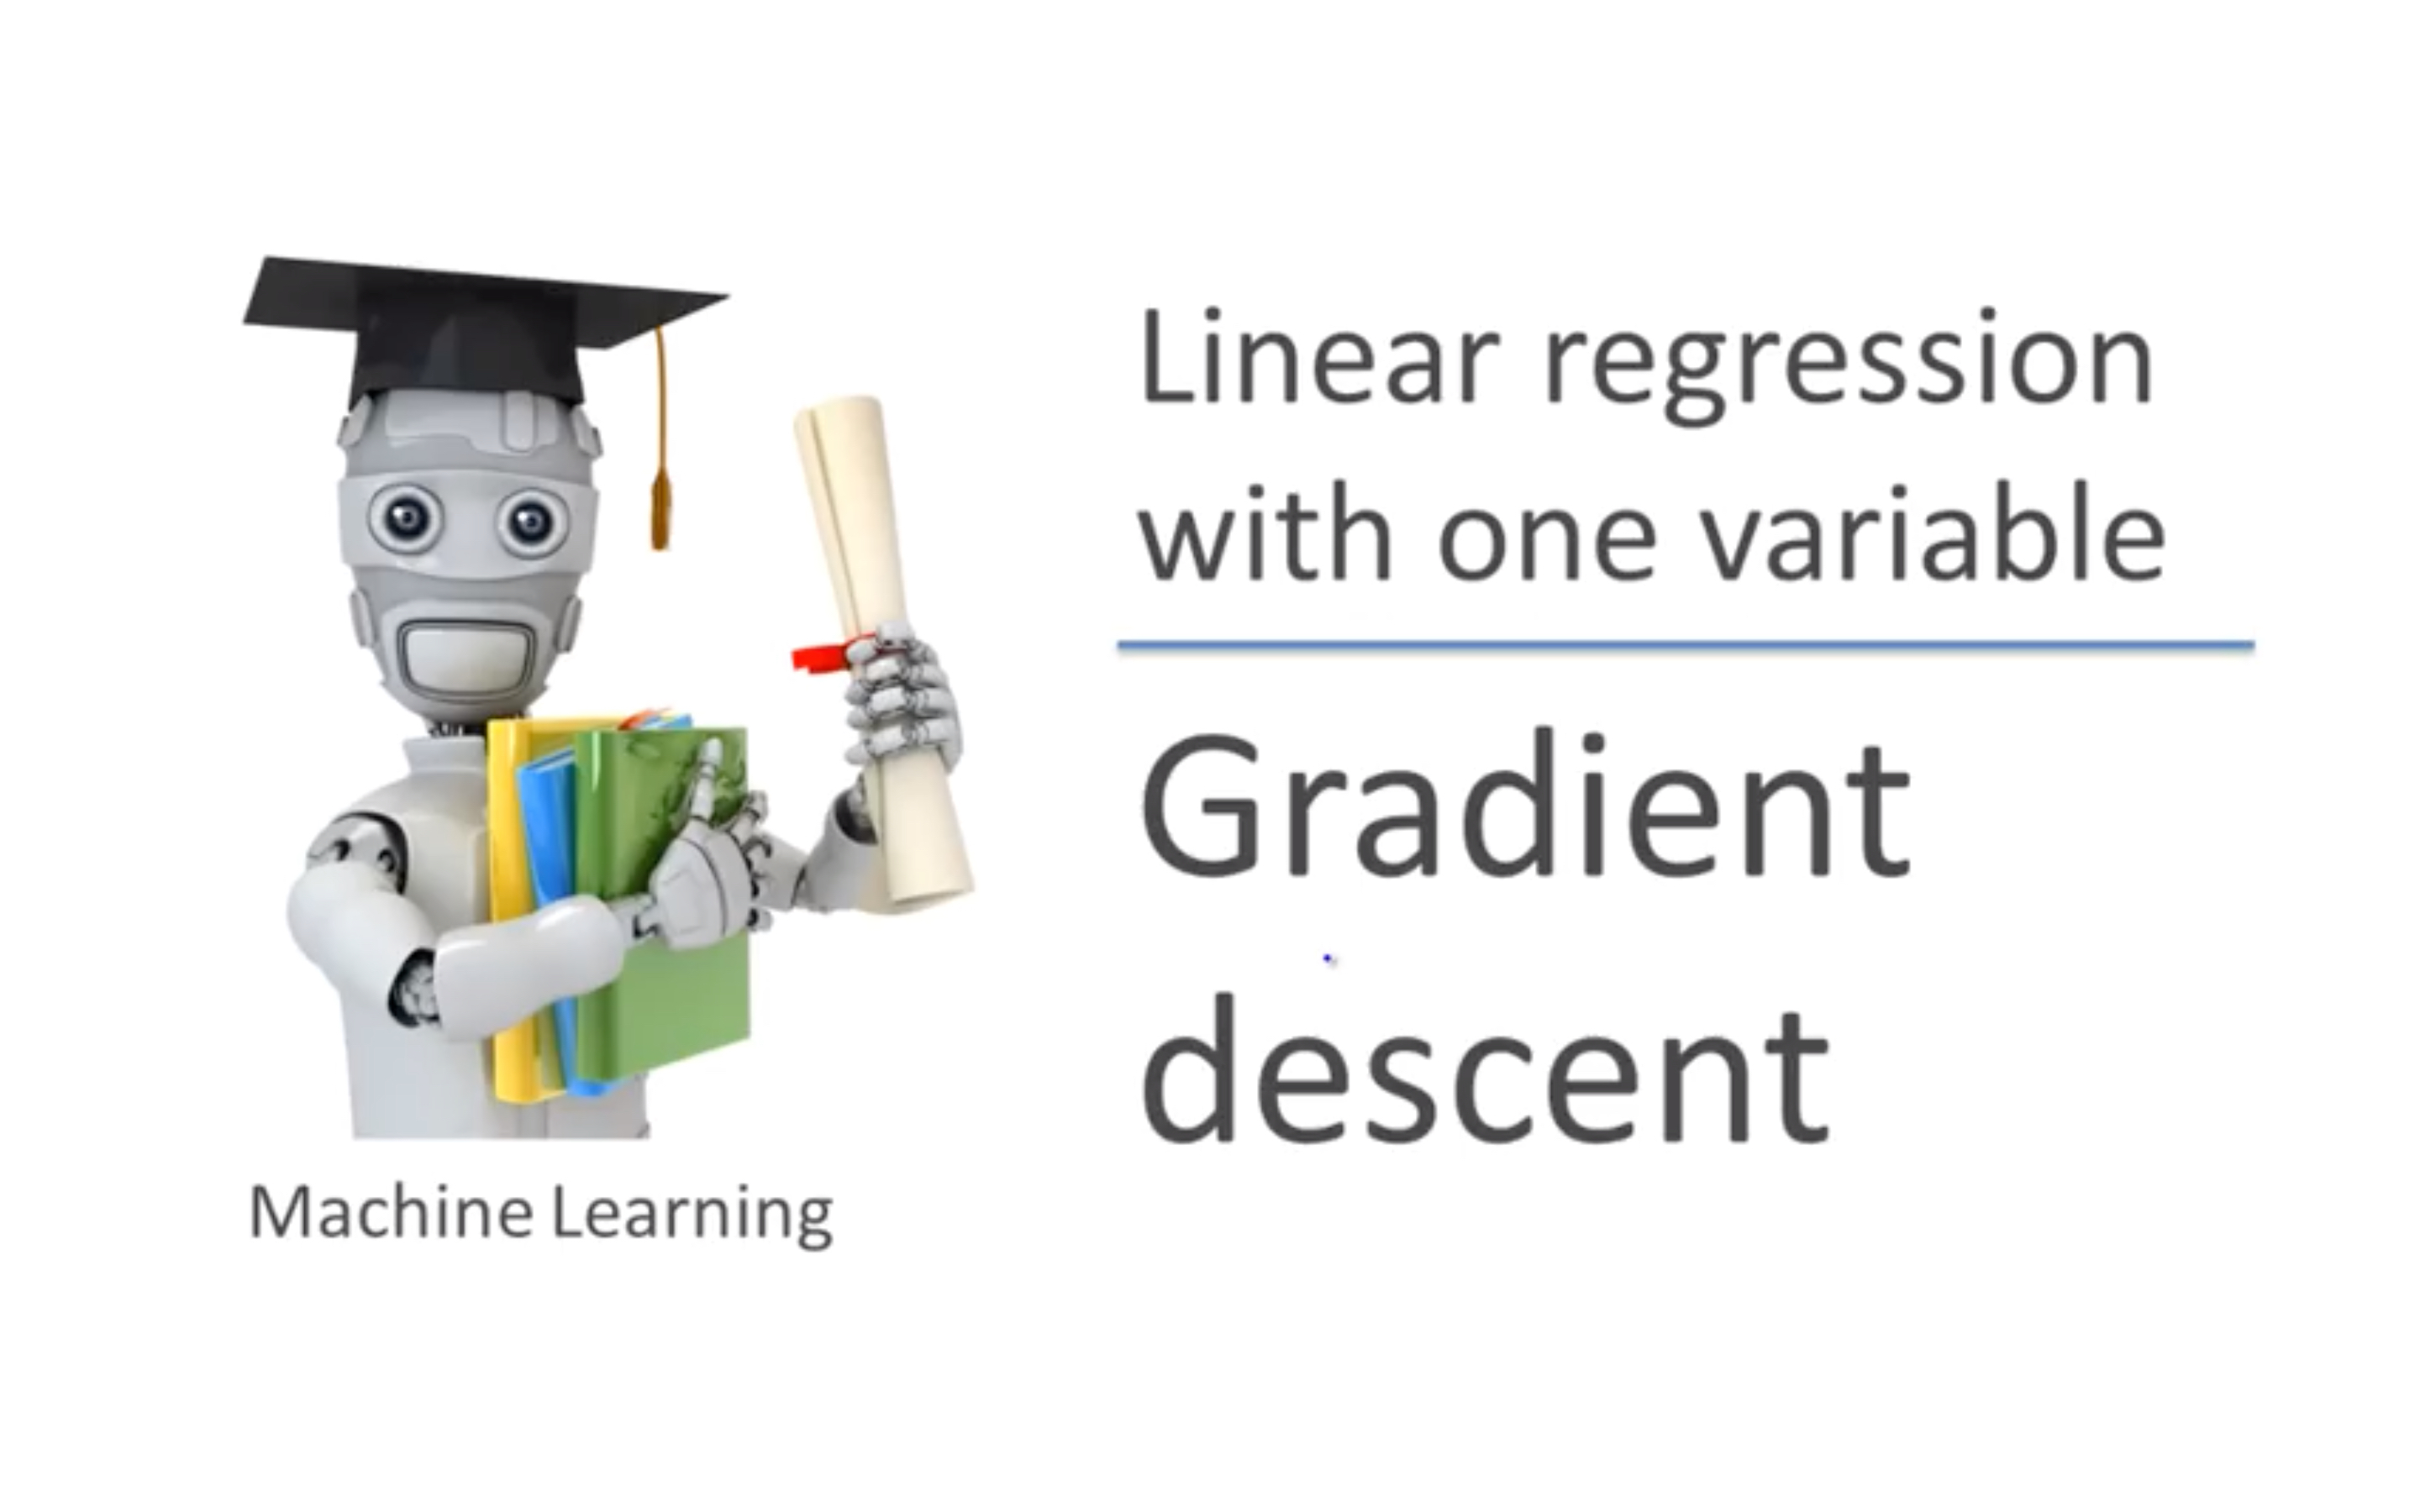

-   [Gradient Descent
    (Math)](https://youtu.be/sOou4izGINg?si=_Fz1V1tbGk8usJR0) <br/>
    (11:30 m)
-   [Intuition](https://youtu.be/DS83GeqWQqs?si=kOfDpHT_4t8hl_YL)
    <br/>(11:51 m)
-   [Linear
    Regression](https://www.youtube.com/watch?v=nOMy9LIcIkI&list=PLb0Gp98iu3OyY9zWJfSMq26nmkNKztNhA&index=6)
    <br/>(10:20 m)
-   [ML-005 \| Stanford \| Andrew
    Ng](https://www.youtube.com/playlist?list=PLoR5VjrKytrCv-Vxnhp5UyS1UjZsXP0Kj)<br/>
    (19 videos)

[Andrew Ng](https://www.andrewng.org) is presenting the gradient descent
algorithm using a linear regression with one variable.

Andrew Ng is Founder of [DeepLearning.AI](https://www.deeplearning.ai/),
Founder & CEO of [Landing AI](https://landing.ai/), General Partner at
[AI Fund](https://aifund.ai/), Chairman and Co-Founder of
[Coursera](https://www.coursera.org/) and an Adjunct Professor at
Stanford University’s Computer Science Department.

Ng was also a cofounder and head of [Google
Brain](https://en.wikipedia.org/wiki/Google_Brain "Google Brain") and
was the former Chief Scientist at
[Baidu](https://en.wikipedia.org/wiki/Baidu "Baidu").

## Fundamentals by Herman Kamper

<https://www.youtube.com/watch?v=BlnLoqn3ZBo&list=PLmZlBIcArwhOr0ysO1Hg4Wfoww0dZnHz4>

# Mathematics

## 3Blue1Brown

-   [Essence of **linear
    algebra**](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
    -   A series of 16 videos (10 to 15 minutes per video) providing “a
        geometric understanding of matrices, determinants, eigen-stuffs
        and more.”
        -   6,662,732 views as of September 30, 2019.
-   [Essence of
    **calculus**](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)
    -   A series of 12 videos (15 to 20 minutes per video): “The goal
        here is to make calculus feel like something that you yourself
        could have discovered.”
        -   2,309,726 views as of September 30, 2019.

## Next lecture

-   Logistic regression

# Appendix

## LinearRegression

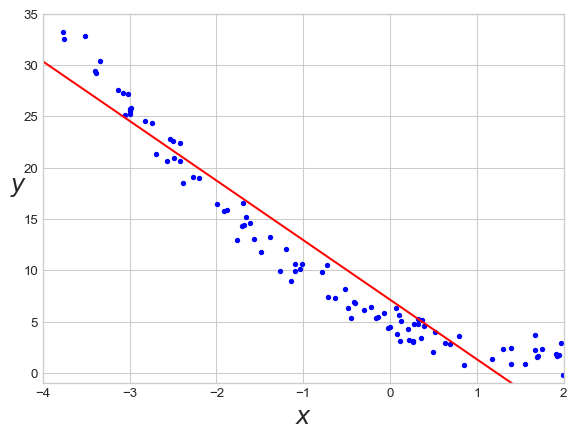

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

Herein, we examine a straightforward model involving a single variable.

## Source code

In [26]:
import numpy as np

X = 6 * np.random.rand(100, 1) - 4
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[-4], [2]])
y_pred = lin_reg.predict(X_new)

This slide contains an anomaly. Can you identify it?

The data have been generated from a quadratic model, $x^2 - 4x + 5$,
with Gaussian noise added to make the synthetic data more realistic.

This example illustrates that, in practice, we often have limited
knowledge about the underlying model that generated the data.

Despite this uncertainty, we make assumptions—in this case, assuming
linearity—when building our models.

Later, we will refer to this as **bias** (distinct from the bias
parameter in our regression model). Both bias and variance influence the
performance of our models.

## GPT 4o interactions (2024-09-14)

**User**: Explain the code on the previous slide line by line.

. . .

**AI**: Certainly! Here is a line-by-line explanation of the provided
code:

In [27]:
import numpy as np

-   **Explanation**: This line imports the NumPy library, which is a
    fundamental package for numerical computations in Python. It is
    commonly used for working with arrays and matrices, as well as for
    performing a variety of mathematical operations.

In [28]:
X = 6 * np.random.rand(100, 1) - 4

-   **Explanation**: This line generates a NumPy array `X` containing
    100 rows and 1 column of random numbers. The
    `np.random.rand(100, 1)` function generates uniformly distributed
    random numbers between 0 and 1. Multiplying by 6 scales these
    numbers to the range \[0, 6), and subtracting 4 shifts the range to
    \[-4, 2).

In [29]:
y = X ** 2 - 4 * X + 5 + np.random.randn(100, 1)

-   **Explanation**: This line generates the target variable `y` based
    on a quadratic equation with some added noise. Specifically:
    -   `X ** 2` computes the square of each element in `X`.
    -   `- 4 * X` subtracts four times each element in `X`.
    -   `+ 5` adds a constant term of 5.
    -   `+ np.random.randn(100, 1)` adds Gaussian noise with a mean of 0
        and standard deviation of 1 to each element, making the data
        more realistic by introducing some randomness.

In [30]:
from sklearn.linear_model import LinearRegression

-   **Explanation**: This line imports the `LinearRegression` class from
    the `sklearn.linear_model` module, which is part of the Scikit-Learn
    library. Scikit-Learn is widely used for machine learning in Python.

In [31]:
lin_reg = LinearRegression()

-   **Explanation**: This line creates an instance of the
    `LinearRegression` class and assigns it to the variable `lin_reg`.
    This object will be used to fit the linear regression model to the
    data.

In [32]:
lin_reg.fit(X, y)

-   **Explanation**: This line fits the linear regression model to the
    data by finding the best-fitting line through the points `(X, y)`.
    The `fit` method trains the model using the provided features `X`
    and target variable `y`.

In [33]:
X_new = np.array([[-4], [2]])

-   **Explanation**: This line creates a new NumPy array `X_new` with
    two values: -4 and 2. These values represent new data points for
    which we want to predict the target variable using the trained
    model.

In [34]:
y_pred = lin_reg.predict(X_new)

-   **Explanation**: This line uses the trained linear regression model
    to predict the target variable `y_pred` for the new data points in
    `X_new`. The `predict` method returns the predicted values based on
    the fitted model.

In summary, this script generates synthetic data, fits a linear
regression model to it, and then uses the model to make predictions on
new data points.

## Source code (continued)

In [35]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Source code (continued)

In [36]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-4, 2, -1, 35])
save_fig("regression_linear-01")
plt.show()

## References

Azzalini, A., and A. W. Bowman. 1990. “A Look at Some Data on the Old
Faithful Geyser.” *Journal of the Royal Statistical Society Series C:
Applied Statistics* 39 (3): 357–65. <https://doi.org/10.2307/2347385>.

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

Stanton, Jeffrey M. 2001. “Galton, Pearson, and the Peas: A Brief
History of Linear Regression for Statistics Instructors.” *Journal of
Statistics Education* 9 (3).
<https://doi.org/10.1080/10691898.2001.11910537>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa